In [1]:
# Importing the necessary libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Loading dataset from Hugging Face and converting to a pandas DataFrame
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Converting the 'job_posted_date' column to datetime format
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Converting 'job_skills' from stringified lists to actual Python lists
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x
)

In [2]:
# Set the country for filtering job data
v_job_country = 'India'

# Filter the dataset for jobs in the selected country
df_Ind = df[(df['job_country'] == v_job_country)].copy()

# Remove rows where average yearly salary is missing
df_Ind_cleaned = df_Ind.dropna(subset=['salary_year_avg'])

In [3]:
# Find the top 6 job titles in India based on highest median salary
job_titles = df_Ind_cleaned.groupby('job_title_short')['salary_year_avg'] \
    .median() \
    .sort_values(ascending=False) \
    .head(6) \
    .index.to_list()

# Create a list of job titles that do NOT include the word "Engineer"
job_order = [title for title in job_titles if "Engineer" not in title]

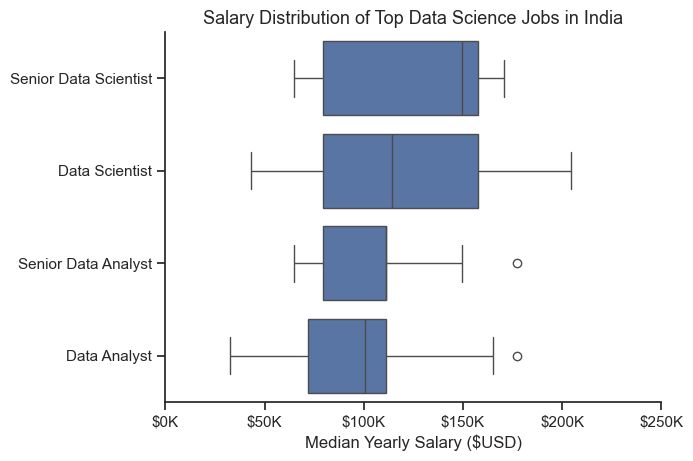

In [4]:
# Filter the dataset to include only the selected top job titles (excluding 'Engineer' roles)
df_plot = df_Ind_cleaned[df_Ind_cleaned['job_title_short'].isin(job_order)]

# Set a clean and minimal style for the plot
sns.set_theme(style='ticks')

# Create a box plot to show the salary distribution by job title
sns.boxplot(
    data=df_plot,
    x='salary_year_avg',
    y='job_title_short',
    order=job_order
)

# Remove top and right borders of the plot
sns.despine()

# Set x-axis limit to avoid extreme outliers cluttering the chart
plt.xlim(0, 250_000)

# Format the x-axis values as currency in thousands (e.g., $100K)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

# Add plot title and axis labels
plt.title(f"Salary Distribution of Top Data Science Jobs in {v_job_country}", fontsize=13)
plt.xlabel("Median Yearly Salary ($USD)")
plt.ylabel('')  # Hides y-axis label since it's obvious from job titles

# Show the final plot
plt.show()